In [1]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem
from scipy.stats import shapiro

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")


# Take in all of our data and read it into pandas, change to DataFrame, select only 20y
gpd_growth_data= os.path.join("Resources/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_713083.csv")
gpd_growth_df=pd.read_csv(gpd_growth_data, skiprows=4)
gdp_growth20y_df = gpd_growth_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#gdp_growth20y_df.head()

# Melt
gdp_growth20y_dfm = gdp_growth20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#gdp_growth20y_dfm.head()

gdp_growth20y_dfm=gdp_growth20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"GDP Growth (% Annual)"})
gdp_growth20y_dfm=gdp_growth20y_dfm.drop(columns="Indicator Name")

# Take in all of our data and read it into pandas, change to DataFrame, select only 20y
gpd_per_capita_data= os.path.join("Resources/API_NY.GDP.PCAP.KD.ZG_DS2_en_csv_v2_712993.csv")
gpd_per_capita_df=pd.read_csv(gpd_per_capita_data, skiprows=4)
gdp_pc20y_df = gpd_per_capita_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#gdp_pc20y_df.head()
# Melt
gdp_pc20y_dfm = gdp_pc20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#gdp_pc20y_dfm.head()

gdp_pc20y_dfm=gdp_pc20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"GDP Per Capita"})
gdp_pc20y_dfm=gdp_pc20y_dfm.drop(columns="Indicator Name")
#gdp_pc20y_dfm.head()

# Merge two dataframes using a left join
merge_gdp = pd.merge(gdp_growth20y_dfm, gdp_pc20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp.head()

# Take in all of our data and read it into pandas, change to DataFrame, select only 20y
access_electricity_data= os.path.join("Resources/API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_714075.csv")
access_electricity_df=pd.read_csv(access_electricity_data, skiprows=4)
access_electricity20y_df = access_electricity_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#access_electricity20y_df.head()
# Melt
access_electricity20y_dfm = access_electricity20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#access_electricity20y_dfm.head()

access_electricity20y_dfm=access_electricity20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Access to Electricity (% population)"})
access_electricity20y_dfm=access_electricity20y_dfm.drop(columns="Indicator Name")
#access_electricity20y_dfm.head()

# Merge two dataframes using a left join
merge_gdp_elec = pd.merge(merge_gdp, access_electricity20y_dfm, on=["Country Name", "Year"], how="left")
merge_gdp_elec.head()

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population)
0,Aruba,1998,1.991988,-0.141877,100.0
1,Afghanistan,1998,NaN,NaN,NaN
2,Angola,1998,4.691146,1.364724,NaN
3,Albania,1998,8.830088,9.517153,100.0
4,Andorra,1998,3.194790,3.492427,100.0


In [2]:
# Agricultural land (% of land area)
#perc_agric_land_data= os.path.join("Resources/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_713399.csv")
#perc_agric_land_df=pd.read_csv(perc_agric_land_data, skiprows=4)
#perc_agric_land20y_df = perc_agric_land_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#perc_agric_land20y_dfm = perc_agric_land20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#perc_agric_land20y_dfm = perc_agric_land20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Agricultural land (% land area)"})
#perc_agric_land20y_dfm = perc_agric_land20y_dfm.drop(columns="Indicator Name")
#perc_agric_land20y_dfm.head()
#
# Merging to previous dataframes using a left join
#merge_gdp_elec_agri = pd.merge(merge_gdp_elec, perc_agric_land20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp_elec_agri.head()

# Bird species (threatened)
#bird_threaten_data= os.path.join("Resources/API_EN.BIR.THRD.NO_DS2_en_csv_v2_715614.csv")
#bird_threaten_df=pd.read_csv(bird_threaten_data, skiprows=4)
#
#bird_threaten20y_df = bird_threaten_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#bird_threaten20y_dfm = bird_threaten20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#bird_threaten20y_dfm = bird_threaten20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Bird species threatened"})
#bird_threaten20y_dfm = bird_threaten20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_gdp_elec_agri_bird = pd.merge(merge_gdp_elec_agri, bird_threaten20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp_elec_agri_bird.head()

# CO2 emissions (kt)
CO2_emissions_data= os.path.join("Resources/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv")
CO2_emissions_df=pd.read_csv(CO2_emissions_data, skiprows=4)

CO2_emissions20y_df = CO2_emissions_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
CO2_emissions20y_dfm = CO2_emissions20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
CO2_emissions20y_dfm = CO2_emissions20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"CO2 emissions (kt)"})
CO2_emissions20y_dfm = CO2_emissions20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_gdp_elec_agri_bird_co = pd.merge(merge_gdp_elec, CO2_emissions20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp_elec_agri_bird_co.head()

# CO2 emissions (metric tons per capita)
CO2_emissions_mtpc_data= os.path.join("Resources/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv")
CO2_emissions_mtpc_df=pd.read_csv(CO2_emissions_mtpc_data, skiprows=4)

CO2_emissions_mtpc20y_df = CO2_emissions_mtpc_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
CO2_emissions_mtpc20y_dfm = CO2_emissions_mtpc20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
CO2_emissions_mtpc20y_dfm = CO2_emissions_mtpc20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"CO2 emissions (metric tons per capita)"})
CO2_emissions_mtpc20y_dfm = CO2_emissions_mtpc20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_gdp_elec_agri_bird_co_co = pd.merge(merge_gdp_elec_agri_bird_co, CO2_emissions_mtpc20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp_elec_agri_bird_co_co.head()


# Droughts, floods, extreme temperatures (% of population)
#droughts_floods_exttemp_data= os.path.join("Resources/API_EN.CLC.MDAT.ZS_DS2_en_csv_v2_713688.csv")
#droughts_floods_exttemp_df=pd.read_csv(droughts_floods_exttemp_data, skiprows=4)
#
#droughts_floods_exttemp20y_df = droughts_floods_exttemp_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#droughts_floods_exttemp20y_dfm = droughts_floods_exttemp20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#droughts_floods_exttemp20y_dfm = droughts_floods_exttemp20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Droughts, floods, extreme temp (% population)"})
#droughts_floods_exttemp20y_dfm = droughts_floods_exttemp20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_droughts = pd.merge(merge_gdp_elec_agri_bird_co_co, droughts_floods_exttemp20y_dfm, on=["Country Name", "Year"], how="left")
#merge_droughts.head()

# Energy use per capita
#energ_use_pc_data= os.path.join("Resources/API_EG.USE.PCAP.KG.OE_DS2_en_csv_v2_715552.csv")
#energ_use_pc_df=pd.read_csv(energ_use_pc_data, skiprows=4)
#
#energ_use_pc20y_df = energ_use_pc_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#energ_use_pc20y_dfm = energ_use_pc20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#energ_use_pc20y_dfm = energ_use_pc20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Energy use per capita"})
#energ_use_pc20y_dfm = energ_use_pc20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_eupc = pd.merge(merge_droughts, energ_use_pc20y_dfm, on=["Country Name", "Year"], how="left")
#merge_eupc.head()

# Forest area (% of land area)
perc_forest_area_data= os.path.join("Resources/API_AG.LND.FRST.ZS_DS2_en_csv_v2_712984.csv")
perc_forest_area_df=pd.read_csv(perc_forest_area_data, skiprows=4)

perc_forest_area20y_df = perc_forest_area_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
perc_forest_area20y_dfm = perc_forest_area20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
perc_forest_area20y_dfm = perc_forest_area20y_dfm.rename(columns={"Country Name":"Country Name",
                                                                  "variable":"Year","value":"Forest Area (% of land)"})

perc_forest_area20y_dfm = perc_forest_area20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_forest_area = pd.merge(merge_gdp_elec_agri_bird_co_co, perc_forest_area20y_dfm, on=["Country Name", "Year"], how="left")
#merge_forest_area.head()

# Forest area (sq. km)
forest_area_data= os.path.join("Resources/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv")
forest_area_df=pd.read_csv(forest_area_data, skiprows=4)

forest_area20y_df = forest_area_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
forest_area20y_dfm = forest_area20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
forest_area20y_dfm = forest_area20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Forest area (sq.km)"})
forest_area20y_dfm = forest_area20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_forest_sqkm = pd.merge(merge_forest_area, forest_area20y_dfm, on=["Country Name", "Year"], how="left")
#merge_forest_sqkm.head()

# GINI
gini_data= os.path.join("Resources/API_SI.POV.GINI_DS2_en_csv_v2_713026.csv")
gini_df=pd.read_csv(gini_data, skiprows=4)

gini20y_df = gini_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
gini20y_dfm = gini20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
gini20y_dfm = gini20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"GINI"})
gini20y_dfm = gini20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_gini = pd.merge(merge_forest_sqkm, gini20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gini.head()

# Life expectancy Female
#life_exp_female_data= os.path.join("Resources/API_SP.DYN.LE00.FE.IN_DS2_en_csv_v2_718212.csv")
#life_exp_female_df=pd.read_csv(life_exp_female_data, skiprows=4)
#
#life_exp_female20y_df = life_exp_female_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#life_exp_female20y_dfm = life_exp_female20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#life_exp_female20y_dfm = life_exp_female20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Life Expectancy Female"})
#life_exp_female20y_dfm = life_exp_female20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_lefemale = pd.merge(merge_gini, life_exp_female20y_dfm, on=["Country Name", "Year"], how="left")
#merge_lefemale.head()

# Life expectancy at birth
#life_expc_ab_data= os.path.join("Resources/API_SP.DYN.LE00.IN_DS2_en_csv_v2_713010.csv")
#life_expc_ab_df=pd.read_csv(life_expc_ab_data, skiprows=4)
#
#life_expc_ab20y_df = life_expc_ab_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#life_expc_ab20y_dfm = life_expc_ab20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#life_expc_ab20y_dfm = life_expc_ab20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Life Expectancy at Birth"})
#life_expc_ab20y_dfm = life_expc_ab20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_le_atb = pd.merge(merge_lefemale, life_expc_ab20y_dfm, on=["Country Name", "Year"], how="left")
#merge_le_atb.head()

# Methane emissions (kt of CO2 equivalent)
methane_emissions_data= os.path.join("Resources/API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_717026.csv")
methane_emissions_df=pd.read_csv(methane_emissions_data, skiprows=4)

methane_emissions20y_df = methane_emissions_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
methane_emissions20y_dfm = methane_emissions20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
methane_emissions20y_dfm  = methane_emissions20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Methane emissions (kt of CO2 equivalent)"})
methane_emissions20y_dfm  = methane_emissions20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_methane = pd.merge(merge_gini, methane_emissions20y_dfm, on=["Country Name", "Year"], how="left")
#merge_methane.head()

# Population growth (annual %)
pop_grow_data= os.path.join("Resources/API_SP.POP.GROW_DS2_en_csv_v2_715046.csv")
pop_grow_df=pd.read_csv(pop_grow_data, skiprows=4)

pop_grow20y_df = pop_grow_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
pop_grow20y_dfm = pop_grow20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
pop_grow20y_dfm = pop_grow20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Population growth (annual)"})
pop_grow20y_dfm = pop_grow20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_popgrow = pd.merge(merge_methane, pop_grow20y_dfm, on=["Country Name", "Year"], how="left")
#merge_popgrow.head()

# Population Total
pop_total_data= os.path.join("Resources/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv")
pop_total_df=pd.read_csv(pop_total_data, skiprows=4)

pop_total20y_df = pop_total_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
pop_total20y_dfm = pop_total20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
pop_total20y_dfm = pop_total20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Population Total"})
pop_total20y_dfm = pop_total20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_pop_tot = pd.merge(merge_popgrow, pop_total20y_dfm, on=["Country Name", "Year"], how="left")
#merge_pop_tot.head()

# Renewable energy consumption (% of total final energy consumption)
renew_energy_consumpt_data= os.path.join("Resources/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_716974.csv")
renew_energy_consumpt_df=pd.read_csv(renew_energy_consumpt_data, skiprows=4)

renew_energy_consumpt20y_df = renew_energy_consumpt_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
renew_energy_consumpt20y_dfm = renew_energy_consumpt20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
renew_energy_consumpt20y_dfm = renew_energy_consumpt20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Renewable energy consumption (% of total energy consump)"})
renew_energy_consumpt20y_dfm = renew_energy_consumpt20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_renew = pd.merge(merge_pop_tot, renew_energy_consumpt20y_dfm, on=["Country Name", "Year"], how="left")
#merge_renew.head()

# Total greenhouse gas emissions (kt of CO2 equivalent)
total_ghge_data= os.path.join("Resources/API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_717015.csv")
total_ghge_df=pd.read_csv(total_ghge_data, skiprows=4)

total_ghge20y_df = total_ghge_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
total_ghge20y_dfm = total_ghge20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
total_ghge20y_dfm = total_ghge20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Total greenhouse gas emission (kt of CO2 equivalent)"})
total_ghge20y_dfm = total_ghge20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_greenhouse = pd.merge(merge_renew, total_ghge20y_dfm, on=["Country Name", "Year"], how="left")
#merge_greenhouse.head()

# Urban population_perc_of total population
urban_perc_totalpop_data= os.path.join("Resources/API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_718765.csv")
urban_perc_total_pop_df=pd.read_csv(urban_perc_totalpop_data, skiprows=4)

urban_perc_total_pop20y_df = urban_perc_total_pop_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
urban_perc_total_pop20y_dfm = urban_perc_total_pop20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
urban_perc_total_pop20y_dfm = urban_perc_total_pop20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Urban population (% of Tot Pop)"})
urban_perc_total_pop20y_dfm = urban_perc_total_pop20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_urbanpop = pd.merge(merge_greenhouse, urban_perc_total_pop20y_dfm, on=["Country Name", "Year"], how="left")
#merge_urbanpop.head()

# NOTE TO THE TEAM: Years changed. Now from 2002 to 2018 only. 
# Rule of Law
rule_law_data= os.path.join("Resources/rule_law_raw_data.csv")
rule_law_df=pd.read_csv(rule_law_data)

rule_law20y_df = rule_law_df[["Country Name","Indicator Id","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#rule_law20y_df.head()

# Filter, selecting only Rule of Law Estimate (indicator id = 370 in the database)
rule_law20y_df = rule_law20y_df.loc[rule_law20y_df["Indicator Id"]==370]
#rule_law20y_df.head()

# Melt, organizing, renaming
rule_law20y_dfm = rule_law20y_df.melt(id_vars=["Country Name", "Indicator Id"], value_vars=["2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
rule_law20y_dfm = rule_law20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Rule of Law Estimate"})
rule_law20y_dfm = rule_law20y_dfm.drop(columns="Indicator Id")
#rule_law20y_dfm.head()

# Merging to previous dataframes using a inner join
merge_rules = pd.merge(merge_urbanpop, rule_law20y_dfm, on=["Country Name", "Year"], how="inner")
#merge_rules.to_csv(index=False)
merge_rules.to_csv("all_data_raw.csv")
merge_rules

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
0,Aruba,2002,-3.273647,-5.405879,100.000000,2438.555,25.671162,2.333333,4.200000,NaN,18.9009,2.229056,94992.0,0.181391,NaN,45.972,NaN
1,Afghanistan,2002,NaN,NaN,NaN,1070.764,0.047377,2.067825,13500.000000,NaN,9929.4300,4.496720,22600770.0,43.771149,13842.73810,22.261,-1.670823
2,Angola,2002,13.665687,9.943764,25.073256,12665.818,0.722959,47.708670,594783.984375,NaN,15694.8000,3.329257,17519417.0,72.125126,34490.36900,52.461,-1.617329
3,Albania,2002,4.539961,4.853922,100.000000,3751.341,1.229541,28.267882,7745.399780,31.7,2333.2200,-0.299877,3051010.0,35.896294,7503.05976,43.501,-0.762147
4,Andorra,2002,6.471015,2.354989,100.000000,531.715,7.590615,34.042553,160.000000,NaN,NaN,3.942573,70049.0,16.221819,NaN,91.641,1.252001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,Kosovo,2018,3.813314,2.991943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.794346,1845300.0,NaN,NaN,NaN,-0.370978
3447,"Yemen, Rep.",2018,-2.701475,-4.968007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.357023,28498687.0,NaN,NaN,36.642,-1.790394
3448,South Africa,2018,0.787056,-0.572080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.357697,57779622.0,NaN,NaN,66.355,-0.102496
3449,Zambia,2018,3.794901,0.815169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.912801,17351822.0,NaN,NaN,43.521,-0.344939


In [3]:
# Filter, selecting only OECD members before 2002 (i.e., only 30 countries, currently there are 36 countries)
# example: df.loc[df['B'].isin(['one','three'])]
merge_rules_OECD = merge_rules.loc[merge_rules["Country Name"].isin(["Canada","United States",
                                                                "United Kingdom","Denmark","Iceland",
                                                                "Norway", "Turkey", "Spain", "Portugal", 
                                                                "France","Ireland","Belgium","Germany",
                                                                "Greece","Sweden","Switzerland","Austria",
                                                                "Netherlands","Luxembourg","Italy","Japan",
                                                                "Finland","Australia","New Zealand","Mexico",
                                                                "Czech Republic","Hungary","Poland",
                                                                "South Korea","Slovakia"])]

# print
merge_rules_OECD

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
10,Australia,2002,4.001377,2.739689,100.0,341353.696,17.370452,16.708668,1.283610e+06,NaN,132305.00,1.220564,19651400.0,8.738721,1.117450e+06,84.222,1.799990
11,Austria,2002,1.651554,1.152676,100.0,67073.097,8.299116,46.539113,3.843200e+04,NaN,8792.20,0.491980,8081957.0,24.684870,8.738669e+04,59.655,1.891656
14,Belgium,2002,1.706889,1.251989,100.0,107311.088,10.385495,22.128798,6.700600e+03,NaN,10250.10,0.448269,10332785.0,1.685710,1.380485e+05,97.241,1.374162
32,Canada,2002,3.422146,2.303577,100.0,519335.208,16.560392,38.237336,3.477116e+06,NaN,106819.00,1.087448,31360079.0,21.769837,9.086862e+05,79.888,1.693409
33,Switzerland,2002,0.162613,-0.592227,100.0,40696.366,5.586513,30.443803,1.203200e+04,NaN,5084.65,0.756469,7284753.0,18.691860,5.299742e+04,73.401,1.952487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,Poland,2018,5.148018,5.137714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009801,37978548.0,NaN,NaN,60.058,0.427892
3398,Portugal,2018,2.441267,2.625968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.180137,10281762.0,NaN,NaN,65.211,1.140912
3420,Sweden,2018,2.225239,0.965620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.239854,10183175.0,NaN,NaN,87.431,1.895983
3432,Turkey,2018,2.826776,1.305564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.490445,82319724.0,NaN,NaN,75.143,-0.319298


In [4]:
# Re-index
OECD_df = merge_rules_OECD.reset_index(drop=True)
OECD_df

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
0,Australia,2002,4.001377,2.739689,100.0,341353.696,17.370452,16.708668,1.283610e+06,NaN,132305.00,1.220564,19651400.0,8.738721,1.117450e+06,84.222,1.799990
1,Austria,2002,1.651554,1.152676,100.0,67073.097,8.299116,46.539113,3.843200e+04,NaN,8792.20,0.491980,8081957.0,24.684870,8.738669e+04,59.655,1.891656
2,Belgium,2002,1.706889,1.251989,100.0,107311.088,10.385495,22.128798,6.700600e+03,NaN,10250.10,0.448269,10332785.0,1.685710,1.380485e+05,97.241,1.374162
3,Canada,2002,3.422146,2.303577,100.0,519335.208,16.560392,38.237336,3.477116e+06,NaN,106819.00,1.087448,31360079.0,21.769837,9.086862e+05,79.888,1.693409
4,Switzerland,2002,0.162613,-0.592227,100.0,40696.366,5.586513,30.443803,1.203200e+04,NaN,5084.65,0.756469,7284753.0,18.691860,5.299742e+04,73.401,1.952487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Poland,2018,5.148018,5.137714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009801,37978548.0,NaN,NaN,60.058,0.427892
472,Portugal,2018,2.441267,2.625968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.180137,10281762.0,NaN,NaN,65.211,1.140912
473,Sweden,2018,2.225239,0.965620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.239854,10183175.0,NaN,NaN,87.431,1.895983
474,Turkey,2018,2.826776,1.305564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.490445,82319724.0,NaN,NaN,75.143,-0.319298


In [5]:
# Exploring the Data
OECD_df.describe()

,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
count,476.000000,476.000000,440.000000,3.640000e+02,364.000000,420.000000,4.200000e+02,302.000000,308.000000,476.000000,4.760000e+02,392.000000,3.080000e+02,476.000000,476.000000
mean,2.075427,1.370870,99.959841,4.291550e+05,9.209411,31.587603,3.721024e+05,32.184768,54280.350006,0.689975,4.113397e+07,17.860652,5.717552e+05,78.142256,1.367956
std,2.858996,2.740940,0.236988,1.014772e+06,4.374653,17.005269,8.458108e+05,4.954071,99427.928446,0.667451,6.195329e+07,16.719699,1.265115e+06,10.090480,0.650052
min,-9.132494,-8.997955,97.583931,1.800497e+03,3.157334,0.318005,3.188000e+02,24.900000,331.714000,-1.853715,2.875230e+05,0.934980,3.941862e+03,55.666000,-0.673711
25%,0.939438,0.318952,100.000000,4.728046e+04,5.928351,20.440836,1.772000e+04,28.100000,8566.155807,0.241884,6.912926e+06,6.831548,7.249428e+04,73.299750,1.020488
50%,2.194380,1.505218,100.000000,1.074853e+05,8.345137,32.205275,9.194700e+04,31.800000,18756.311195,0.619064,1.096018e+07,11.308181,1.400727e+05,79.380000,1.642394
75%,3.469159,2.476582,100.000000,3.888102e+05,10.362919,35.705361,1.937475e+05,34.300000,65102.258788,1.122350,6.045764e+07,23.158394,5.656333e+05,85.427000,1.852394
max,25.162533,23.985510,100.000000,5.789727e+06,24.824647,73.292620,3.477116e+06,50.100000,551252.000000,2.919685,3.271674e+08,77.344681,7.244272e+06,98.001000,2.100273


In [6]:
# Exploring the Data
OECD_df.columns

Index(['Country Name', 'Year', 'GDP Growth (% Annual)', 'GDP Per Capita',
       'Access to Electricity (% population)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)', 'Forest Area (% of land)',
       'Forest area (sq.km)', 'GINI',
       'Methane emissions (kt of CO2 equivalent)',
       'Population growth (annual)', 'Population Total',
       'Renewable energy consumption (% of total energy consump)',
       'Total greenhouse gas emission (kt of CO2 equivalent)',
       'Urban population (% of Tot Pop)', 'Rule of Law Estimate'],
      dtype='object')

In [7]:
# Exploring the Data
OECD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 17 columns):
Country Name                                                476 non-null object
Year                                                        476 non-null object
GDP Growth (% Annual)                                       476 non-null float64
GDP Per Capita                                              476 non-null float64
Access to Electricity (% population)                        440 non-null float64
CO2 emissions (kt)                                          364 non-null float64
CO2 emissions (metric tons per capita)                      364 non-null float64
Forest Area (% of land)                                     420 non-null float64
Forest area (sq.km)                                         420 non-null float64
GINI                                                        302 non-null float64
Methane emissions (kt of CO2 equivalent)                    308 non-null float64
Popula

In [8]:
# Drop NaN???
OECD_dfdna = OECD_df.dropna()
OECD_dfdna

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
6,Germany,2002,-0.198459,-0.366113,100.000000,829724.756,10.058672,32.580405,1.136600e+05,30.0,68773.200000,0.168128,82488495.0,4.412637,1.007405e+06,75.374,1.666165
19,Mexico,2002,-0.039844,-1.402932,97.897085,414389.335,4.075235,34.747188,6.754680e+05,50.1,112133.000000,1.373014,101684758.0,10.682781,5.676797e+05,75.365,-0.309769
28,Australia,2003,2.985940,1.722906,100.000000,336271.234,16.901959,16.677427,1.281210e+06,33.5,125529.000000,1.233997,19895400.0,7.151066,1.023668e+06,84.343,1.882049
29,Austria,2003,0.941471,0.450947,100.000000,72195.896,8.889562,46.570599,3.845800e+04,29.5,8704.100000,0.487134,8121423.0,22.578794,9.265984e+04,59.375,1.887247
30,Belgium,2003,1.037953,0.615850,100.000000,112914.264,10.882114,22.174373,6.714400e+03,28.1,9916.400000,0.418642,10376133.0,1.891080,1.440316e+05,97.296,1.365136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Norway,2012,2.703074,1.362950,100.000000,49889.535,9.940980,33.144968,1.210600e+05,25.7,16408.942152,1.313441,5018573.0,58.275850,6.353673e+04,79.874,1.958513
303,Poland,2012,1.607907,1.608150,100.000000,299931.264,7.879830,30.603489,9.371400e+04,33.0,65071.201471,-0.000239,38063164.0,10.915143,4.146069e+05,60.654,0.780411
304,Portugal,2012,-4.057294,-3.667532,100.000000,46013.516,4.376053,35.115187,3.216200e+04,36.0,12976.018286,-0.405422,10514844.0,25.517441,7.252422e+04,61.763,1.065502
305,Sweden,2012,-0.630974,-1.363358,100.000000,47047.610,4.942301,68.917857,2.807300e+05,27.6,10304.223155,0.739763,9519374.0,49.948550,6.576779e+04,85.620,1.951555


The r-squared is: 0.35696448788047475
The p-value is: 4.1971977267066507e-08
The Standard Error is: 0.43468955395505654


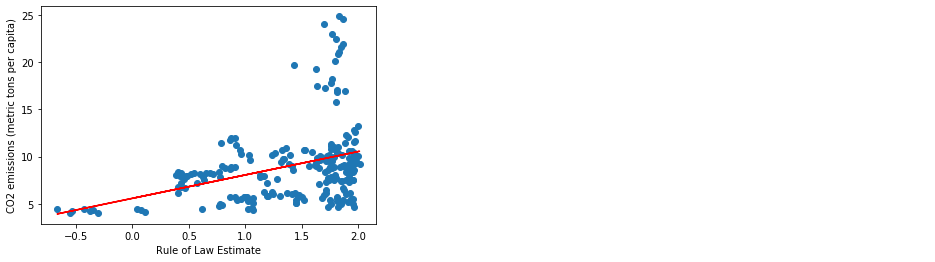

In [9]:
# Print out the r-squared value along with the plot.
x_values = OECD_dfdna["Rule of Law Estimate"]
y_values = OECD_dfdna["CO2 emissions (metric tons per capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Rule of Law Estimate")
plt.ylabel("CO2 emissions (metric tons per capita)")
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")
print(f"The Standard Error is: {stderr}")
plt.show()

In [10]:
# Correlations among OECD members
OECD_df.corr()

,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
GDP Growth (% Annual),1.000000,0.970953,0.014657,0.000100,0.111910,-0.130155,0.048262,0.121155,0.053545,0.261752,-0.025044,-0.026559,0.008987,-0.061365,-0.045551
GDP Per Capita,0.970953,1.000000,0.059494,-0.000985,0.050059,-0.088693,0.009163,0.079474,0.027779,0.023316,-0.019222,-0.045445,0.002696,-0.122073,-0.081778
Access to Electricity (% population),0.014657,0.059494,1.000000,-0.004995,0.207876,-0.024907,-0.059693,-0.594086,-0.107406,-0.183379,-0.189632,0.085668,-0.006123,0.020086,0.499606
CO2 emissions (kt),0.000100,-0.000985,-0.004995,1.000000,0.396913,0.083990,0.655909,0.322272,0.954786,0.005836,0.929887,-0.224342,0.995951,0.075176,0.003854
CO2 emissions (metric tons per capita),0.111910,0.050059,0.207876,0.396913,1.000000,0.042789,0.540062,-0.214798,0.402791,0.282694,0.207466,-0.234077,0.422353,0.316603,0.406023
Forest Area (% of land),-0.130155,-0.088693,-0.024907,0.083990,0.042789,1.000000,0.098465,-0.127426,-0.012378,-0.196018,0.109779,0.125424,0.067296,0.024705,0.108504
Forest area (sq.km),0.048262,0.009163,-0.059693,0.655909,0.540062,0.098465,1.000000,0.300370,0.746746,0.177217,0.563929,-0.072161,0.693669,0.119789,0.093853
GINI,0.121155,0.079474,-0.594086,0.322272,-0.214798,-0.127426,0.300370,1.000000,0.472810,0.211264,0.587638,-0.345284,0.322989,-0.331270,-0.696833
Methane emissions (kt of CO2 equivalent),0.053545,0.027779,-0.107406,0.954786,0.402791,-0.012378,0.746746,0.472810,1.000000,0.125198,0.896010,-0.218416,0.969993,0.042490,-0.064545
Population growth (annual),0.261752,0.023316,-0.183379,0.005836,0.282694,-0.196018,0.177217,0.211264,0.125198,1.000000,-0.026638,0.076954,0.030777,0.235779,0.141959


In [11]:
# Correlations all countries
merge_rules.corr()

,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
GDP Growth (% Annual),1.000000,0.956864,-0.117368,0.025638,-0.026547,-0.076514,0.006167,0.135537,0.070785,0.195327,0.081382,0.109446,0.039690,-0.120324,-0.159782
GDP Per Capita,0.956864,1.000000,-0.003076,0.051686,-0.079563,-0.015262,0.024262,0.042000,0.091124,-0.088522,0.094540,0.040818,0.065300,-0.084883,-0.083868
Access to Electricity (% population),-0.117368,-0.003076,1.000000,0.133799,0.457286,-0.011480,0.057852,-0.307576,0.087429,-0.394028,0.033534,-0.789039,0.114826,0.625385,0.527187
CO2 emissions (kt),0.025638,0.051686,0.133799,1.000000,0.153181,-0.021696,0.434248,0.041121,0.883117,-0.086663,0.751912,-0.130373,0.978933,0.081949,0.079146
CO2 emissions (metric tons per capita),-0.026547,-0.079563,0.457286,0.153181,1.000000,-0.128386,0.103834,-0.453500,0.060500,0.169383,-0.013883,-0.508095,0.140204,0.521205,0.447374
Forest Area (% of land),-0.076514,-0.015262,-0.011480,-0.021696,-0.128386,1.000000,0.139412,0.249166,-0.029071,-0.205295,-0.051165,0.124666,0.000987,-0.024975,0.054902
Forest area (sq.km),0.006167,0.024262,0.057852,0.434248,0.103834,0.139412,1.000000,0.195812,0.566787,-0.061127,0.302437,-0.008327,0.545009,0.109396,-0.016982
GINI,0.135537,0.042000,-0.307576,0.041121,-0.453500,0.249166,0.195812,1.000000,0.117582,0.337184,0.073034,0.290274,0.079469,-0.114998,-0.424502
Methane emissions (kt of CO2 equivalent),0.070785,0.091124,0.087429,0.883117,0.060500,-0.029071,0.566787,0.117582,1.000000,-0.059994,0.891111,-0.038454,0.933074,0.002123,-0.042633
Population growth (annual),0.195327,-0.088522,-0.394028,-0.086663,0.169383,-0.205295,-0.061127,0.337184,-0.059994,1.000000,-0.036575,0.259313,-0.082208,-0.144570,-0.269157


In [27]:
# normality test OECD
stat, p = shapiro(OECD_df["Rule of Law Estimate"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.841, p=0.000
Sample does not look Gaussian (reject H0)


In [28]:
# NORMALITY TEST FOR OECD DATASET
# GDP Growth (% Annual)
# Statistics=0.893, p=0.000
# Sample does not look Gaussian (reject H0)

# GDP Per Capita
# Statistics=0.884, p=0.000
# Sample does not look Gaussian (reject H0)

# Access to Electricity (% population)
# Statistics=nan, p=1.000
# Sample looks Gaussian (fail to reject H0)

# CO2 emissions (kt)
# Statistics=nan, p=1.000
# Sample looks Gaussian (fail to reject H0)

# CO2 emissions (metric tons per capita)
# Statistics=nan, p=1.000
# Sample looks Gaussian (fail to reject H0)

# Forest Area (% of land)
# Statistics=nan, p=1.000
# Sample looks Gaussian (fail to reject H0)

# Forest area (sq.km)
# Statistics=nan, p=1.000
# Sample looks Gaussian (fail to reject H0)

# GINI
# Statistics=nan, p=1.000
# Sample looks Gaussian (fail to reject H0)

# Methane emissions (kt of CO2 equivalent)
# Statistics=nan, p=1.000
# Sample looks Gaussian (fail to reject H0)

# Population growth (annual)
# Statistics=0.981, p=0.000
# Sample does not look Gaussian (reject H0)

# Population Total
# Statistics=0.615, p=0.000
# Sample does not look Gaussian (reject H0)

# Renewable energy consumption (% of total energy consump)
# Statistics=nan, p=1.000
# Sample looks Gaussian (fail to reject H0)

# Total greenhouse gas emission (kt of CO2 equivalent)
# Statistics=nan, p=1.000
# Sample looks Gaussian (fail to reject H0)

# Urban population (% of Tot Pop)
# Statistics=0.969, p=0.000
# Sample does not look Gaussian (reject H0)

# Rule of Law Estimate
# Statistics=0.841, p=0.000
# Sample does not look Gaussian (reject H0)

In [29]:
# normality test All Countries
stat, p = shapiro(merge_rules["GDP Growth (% Annual)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [30]:
# normality test All Countries
stat, p = shapiro(merge_rules["GDP Per Capita"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [31]:
# normality test All Countries
stat, p = shapiro(merge_rules["Access to Electricity (% population)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [32]:
# normality test All Countries
stat, p = shapiro(merge_rules["CO2 emissions (kt)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [33]:
# normality test All Countries
stat, p = shapiro(merge_rules["CO2 emissions (metric tons per capita)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [34]:
# normality test All Countries
stat, p = shapiro(merge_rules["Forest Area (% of land)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [35]:
# normality test All Countries
stat, p = shapiro(merge_rules["Forest area (sq.km)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [36]:
# normality test All Countries
stat, p = shapiro(merge_rules["GINI"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [37]:
# normality test All Countries
stat, p = shapiro(merge_rules["Methane emissions (kt of CO2 equivalent)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [38]:
# normality test All Countries
stat, p = shapiro(merge_rules["Population growth (annual)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [39]:
# normality test All Countries
stat, p = shapiro(merge_rules["Population Total"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [40]:
# normality test All Countries
stat, p = shapiro(merge_rules["Renewable energy consumption (% of total energy consump)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [41]:
# normality test All Countries
stat, p = shapiro(merge_rules["Total greenhouse gas emission (kt of CO2 equivalent)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [42]:
# normality test All Countries
stat, p = shapiro(merge_rules["Urban population (% of Tot Pop)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [43]:
# normality test All Countries
stat, p = shapiro(merge_rules["Rule of Law Estimate"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [ ]:
# Use Pivot_table, then rearange the columns
munging_OECD = pd.pivot_table(merge_rules_OECD,values="Rule of Law Estimate", index="Year", columns="Country Name")

# 1.8 Preview of reformatted work
munging_OECD.head()

In [ ]:
# Creating a plot that shows VARIABLE changes over time for each COUNTRY
plt.errorbar(munging_OECD.index, munging_OECD["Australia"], color="b", 
             marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_OECD.index, munging_OECD["Austria"], color="g", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_OECD.index, munging_OECD["Belgium"], color="k", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_OECD.index, munging_OECD["Mexico"], color="r", 
             marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

# Proper formatting
plt.title("Variable change over time")
plt.ylabel("Variable")
plt.xlabel("Years")
plt.grid(True)

# Save the Figure
#plt.savefig("task1_1.png")

# Show the Figure
plt.show()

In [ ]:
gp = merge_rules.groupby(["Country Name"]).mean()
gp

In [ ]:
gp.sort_values(by="Rule of Law Estimate", ascending=False).head(20)

In [ ]:
gp.sort_values(by="Rule of Law Estimate", ascending=False).tail(20)

In [ ]:
# Melt
gdp_growth20y_dfm= gdp_growth20y_dfm[{"Country Name":"Country Name", "variable":"Year","value":"GDP Growth (% Annual)"}]

gdp_growth20y_dfm.head()
#gdp_pc20y_dfm.head()
#access_electricity20y_dfm

In [ ]:
# Using GroupBy in order to organize the data into fields according to "school" values
grouped_schools_df = data_df.groupby(["school_name","type"])

# In order to be visualized, a data function must be used
#grouped_schools_df.count().head()

# Merge two datasets on "Country Name" so that no data is lost
combined_gdp20y_df = pd.merge(gdp_growth20y_df, gdp_pc20y_df, how="outer", on="Country Name")
combined_gdp20y_df.head()

In [ ]:
# IT WORKS WITH ONE VARIABLE, BUT NOT WITH MORE, SO IT DOESN'T WORK NOW
#Filter, selecting only OECD members before 2002 (i.e., only 30 countries, currently there are 36 countries)
merge_rules = merge_rules.loc[(merge_rules["Country Name"]=="Canada") & (merge_rules["Country Name"]=="United States") & 
                              (merge_rules["Country Name"]=="United Kingdom") & (merge_rules["Country Name"]=="Denmark") & 
                              (merge_rules["Country Name"]=="Iceland") & (merge_rules["Country Name"]=="Norway") & 
                              (merge_rules["Country Name"]=="Turkey") & (merge_rules["Country Name"]=="Spain") & 
                              (merge_rules["Country Name"]=="Portugal") & (merge_rules["Country Name"]=="France") & 
                              (merge_rules["Country Name"]=="Ireland") & (merge_rules["Country Name"]=="Belgium") & 
                              (merge_rules["Country Name"]=="Germany") & (merge_rules["Country Name"]=="Greece") & 
                              (merge_rules["Country Name"]=="Sweden") & (merge_rules["Country Name"]=="Switzerland") & 
                              (merge_rules["Country Name"]=="Austria") & (merge_rules["Country Name"]=="Netherlands") & 
                              (merge_rules["Country Name"]=="Luxembourg") & (merge_rules["Country Name"]=="Italy") & 
                              (merge_rules["Country Name"]=="Japan") & (merge_rules["Country Name"]=="Finland") & 
                              (merge_rules["Country Name"]=="Australia") & (merge_rules["Country Name"]=="New Zealand") & 
                              (merge_rules["Country Name"]=="Mexico") & (merge_rules["Country Name"]=="Czech Republic") & 
                              (merge_rules["Country Name"]=="Hungary") & (merge_rules["Country Name"]=="Poland") & 
                              (merge_rules["Country Name"]=="South Korea") & (merge_rules["Country Name"]=="Slovakia")
                             ] 
merge_rules.info()

In [ ]:
# Transpose
#gdp_growth20y_dft = gdp_growth20y_df.transpose()
#gdp_growth20y_dft.head()